<a href="https://colab.research.google.com/github/Vineetttt/MachineLearning-II/blob/main/Backpropogation_on_IRIS_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [417]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Loading the Iris Dataset

In [433]:
data = load_iris()
X = data.data
y = data.target

One Hot Encoding

In [434]:
y = pd.get_dummies(y).values

Train-test split

In [435]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=20,random_state=4)

Constant parameters

In [436]:
learning_rate = 0.1
iterations = 5000
n = y_train.size

input_size = 4
output_size = 3
hidden_size = 2

results=pd.DataFrame(columns=["mse","accuracy"])

Initialize random weights

In [422]:
np.random.seed(10)

W1=np.random.normal(scale=0.5,size=(input_size,hidden_size))
W2=np.random.normal(scale=0.5,size=(hidden_size,output_size))

Helper Functions

In [423]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

def mean_squared_error(y_pred,y):
  return ((y_pred - y)**2).sum() / y_pred.size

def accuracy(y_pred,y):
  acc = y_pred.argmax(axis =1) == y.argmax(axis =1)
  return acc.mean()

In [424]:
for itr in range(iterations):
    # Feedforward Propogation
    # On Hidden Layer
    Z1 = np.dot(X_train, W1)
    A1 = sigmoid(Z1)

    # On Output Layer
    Z2 = np.dot(A1, W2)
    A2 = sigmoid(Z2)

    mse = mean_squared_error(A2, y_train)
    acc = accuracy(A2, y_train)

    df = pd.DataFrame({"mse": [mse], "accuracy": [acc]})
    results = pd.concat([results, df], ignore_index=True)

    # Backpropogation
    E1 = A2 - y_train
    dW1 = E1 * A2 * (1 - A2)

    E2 = np.dot(dW1, W2.T)
    dW2 = E2 * A1 * (1 - A1)

    # Weight Updation
    W2_update = np.dot(A1.T, dW1) / len(y_train)
    W1_update = np.dot(X_train.T, dW2) / len(y_train)

    W2 = W2 - learning_rate * W2_update
    W1 = W1 - learning_rate * W1_update

    if itr % 500 == 0:
        print(f"Iteration {itr}: MSE = {mse}, Accuracy = {acc}")

Iteration 0: MSE = 0.278200370716067, Accuracy = 0.33076923076923076
Iteration 500: MSE = 0.16343180041999097, Accuracy = 0.6692307692307692
Iteration 1000: MSE = 0.13168256817110216, Accuracy = 0.7692307692307693
Iteration 1500: MSE = 0.12331510883688317, Accuracy = 0.6846153846153846
Iteration 2000: MSE = 0.11989866183720252, Accuracy = 0.8076923076923077
Iteration 2500: MSE = 0.11784063267841628, Accuracy = 0.9
Iteration 3000: MSE = 0.11597485143416959, Accuracy = 0.9692307692307692
Iteration 3500: MSE = 0.11364605070992166, Accuracy = 0.9769230769230769
Iteration 4000: MSE = 0.11071088788450986, Accuracy = 0.9846153846153847
Iteration 4500: MSE = 0.10757351321094594, Accuracy = 0.9846153846153847


In [425]:
print("MSE = ",mse)
print("Accuracy = ",acc)

MSE =  0.10467992137236296
Accuracy =  0.9846153846153847


In [426]:
print("W1 = ",W1)
print("W2 = ",W2)
print("Z1 = ",Z1)
print("Z2 = ",Z2)

W1 =  [[ 0.16668698  0.92133868]
 [-1.69823991  1.15696048]
 [ 1.48166491 -1.8397513 ]
 [ 0.68987133 -0.85503176]]
W2 =  [[-3.68608729  0.30890062  0.99905156]
 [ 2.7693619  -1.12790992 -4.14804987]]
Z1 =  [[-2.68465998  5.92961258]
 [ 5.40656684 -2.29156716]
 [ 4.99942849 -1.30422802]
 [-2.29370861  5.25414223]
 [-2.14205725  4.917358  ]
 [-3.17343413  6.07849058]
 [-1.02254644  4.15831388]
 [-3.52056118  6.75300998]
 [-2.21682758  5.60962211]
 [ 5.24851725 -2.54001721]
 [ 3.50752761 -1.11565799]
 [-2.45503918  5.19318138]
 [ 6.70630066 -3.14463303]
 [-2.06539174  5.23816044]
 [ 2.50678132  0.34109093]
 [ 5.68249231 -2.63349935]
 [ 5.89726381 -2.24212043]
 [ 3.30575968 -0.0336315 ]
 [ 3.85076088 -0.17032979]
 [-3.09426065  5.98000116]
 [ 6.8133174  -2.62428596]
 [-2.57982619  5.6090808 ]
 [ 3.33731495  0.46707067]
 [-3.02258344  6.3246455 ]
 [ 6.12645359 -3.04790651]
 [-2.67887102  5.32283152]
 [-4.02331171  7.23989382]
 [ 3.14642418 -0.10313276]
 [ 3.70340668 -0.56929647]
 [ 5.379414

Axes(0.125,0.11;0.775x0.77)


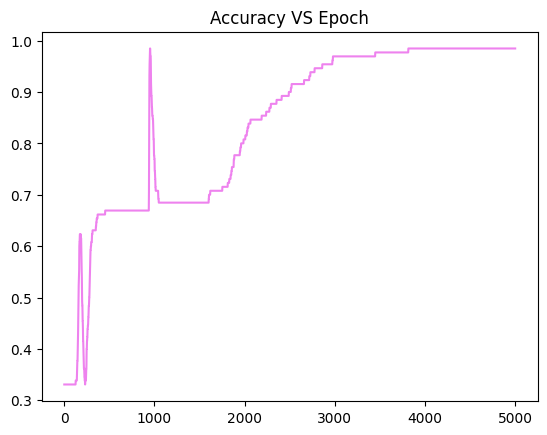

In [427]:
print(results.accuracy.plot(title="Accuracy VS Epoch",color='violet'))

Axes(0.125,0.11;0.775x0.77)


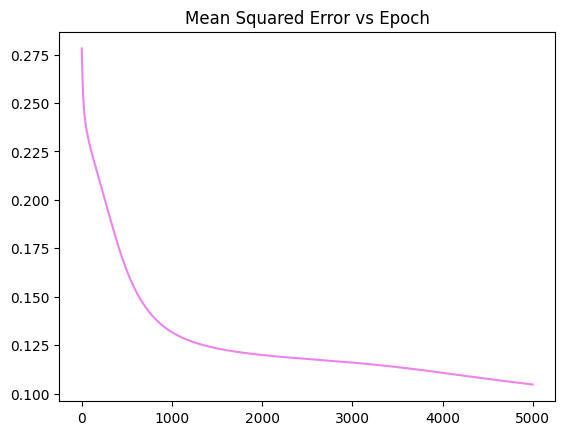

In [428]:
print(results.mse.plot(title="Mean Squared Error vs Epoch",color='violet'))

In [429]:
Z1_test = np.dot(X_test, W1)
A1_test=sigmoid(Z1_test)

In [430]:
Z2_test = np.dot(A1_test, W2)
A2_test=sigmoid(Z2_test)

In [431]:
acc_test = accuracy(A2_test,y_test)
print(acc_test)

0.95


In [432]:
mse_test = mean_squared_error(A2_test,y_test)
print(mse_test)

0.091982096674499
